Multiple Regression
-------

![](https://cdn.meme.am/cache/instances/folder501/500x/65448501.jpg)

A company that makes carseats would like to construct a model to predict sales. 

The data is here: https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv 

It contains 400 observations on the following 11 variables:

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

-----

Load in datasets

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

%matplotlib inline

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
df.columns = map(str.lower, df.columns)

In [51]:
df.head()


,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Visualize the data with the appropriate plots. 

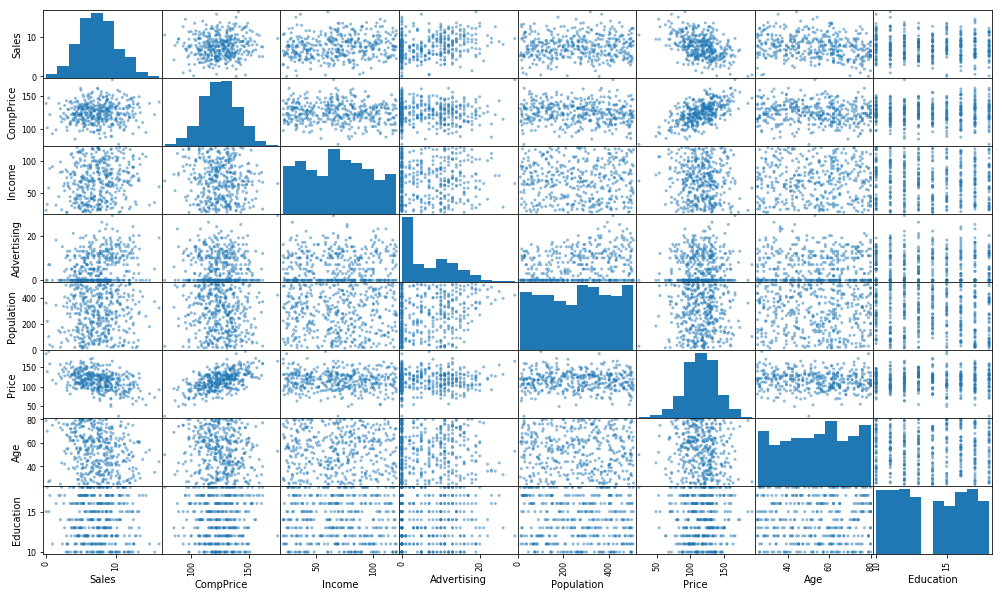

In [8]:
# For example
pd.plotting.scatter_matrix(df, figsize=(17, 10), edgecolor='none', alpha=0.5);

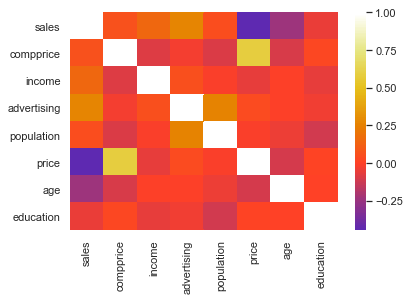

In [49]:
import seaborn as sns
sns.set()

corr = df.corr()
sns.heatmap(data = corr, center = 0, cmap="CMRmap");

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


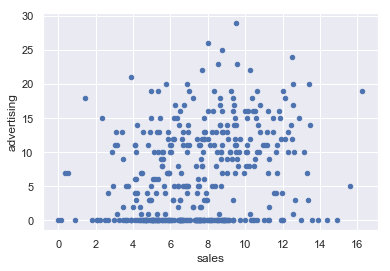

In [25]:
df.plot("sales", "advertising", kind="scatter")

What trends do you see in the data?

    The highest relations for sales seem to be advertising and income and shelfloc

In [64]:
df2 = df.copy()
df2 = df2.replace({'Yes': 1, 'No': 0, "Good": 2, "Medium": 1, "Bad": 0})
df2.head()

,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


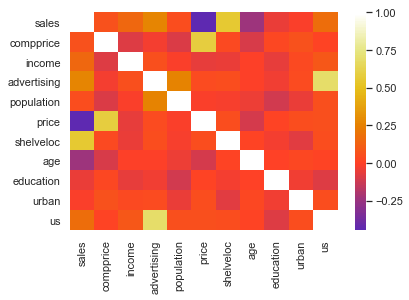

In [65]:
corr2 = df2.corr()
sns.heatmap(data = corr2, center = 0, cmap="CMRmap");

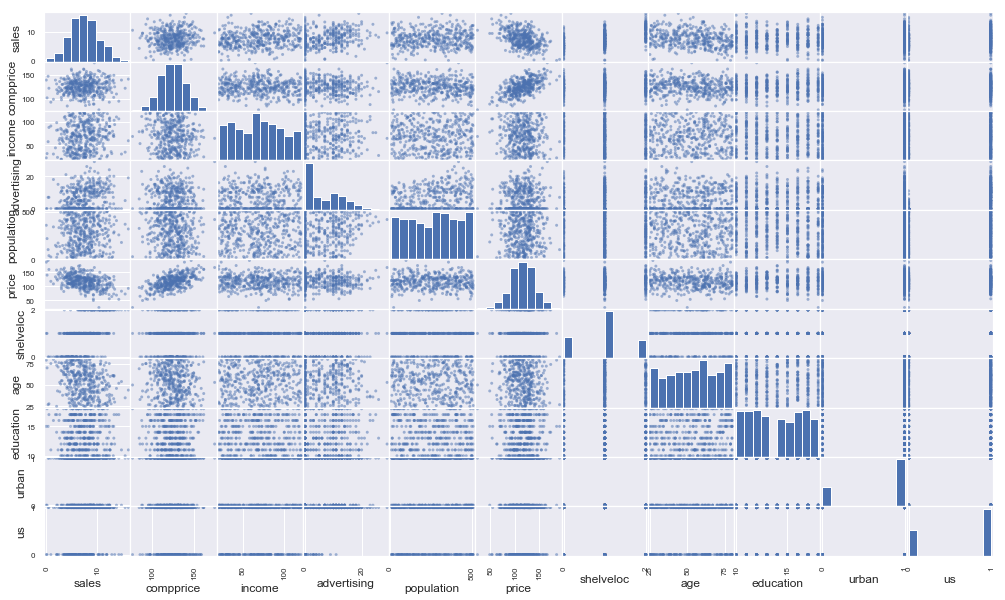

In [66]:
pd.plotting.scatter_matrix(df2, figsize=(17, 10), edgecolor='none', alpha=0.5);

Find the single best predictor for a simple linear regression.

<br>

<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [75]:
import statsmodels.formula.api as smf
y = df2.sales
df2c = list(df2.columns)
for i in df2c:
    X = df2[i]
    X = sm.add_constant(X)
    results = sm.OLS(y,X).fit().rsquared
    #rs = smf.ols(formula='sales ~ i', data=df2).fit().rsquared
    print(i + " : " +  f'{results:.3}')

sales : 1.0
compprice : 0.00411
income : 0.0231
advertising : 0.0726
population : 0.00255
price : 0.198
shelveloc : 0.307
age : 0.0537
education : 0.0027
urban : 0.000238
us : 0.0314


In [78]:
X2 = df2[['advertising', 'shelveloc', "price"]]
X2 = sm.add_constant(X2)
results2 = sm.OLS(y, X2).fit()
sm.OLS(y, X2).fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.63e-66
Time:                        16:05:23   Log-Likelihood:                -830.53
No. Observations:                 400   AIC:                             1667.
Df Residuals:                     397   BIC:                             1679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6875      0.498     23.479      0.000      10.709      12.666
shelveloc      2.4282      0.144     16.829      0.000       2.145       2.712
price         -0.0566      0.004    -13.798      0.000      -0.065      -0.049
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.390
Skew:                           0.064   Prob(JB):                        0.499
Kurtosis:                       2.741   Cond. No.                         609.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fit a the most possible multiple regression.

In [79]:
X3 = df2[["compprice", "income", "advertising", "population", "price", "shelveloc", "age", "education", "urban", "us"]]
X3 = sm.add_constant(X3)
results3 = sm.OLS(y, X3).fit()
sm.OLS(y, X3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     252.9
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          2.15e-163
Time:                        16:07:45   Log-Likelihood:                -579.33
No. Observations:                 400   AIC:                             1181.
Df Residuals:                     389   BIC:                             1225.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4028      0.616      8.775      0.000       4.192       6.613
compprice       0.0926      0.004     21.775      0.000       0.084       0.101
income          0.0162      0.002      8.549      0.000       0.012       0.020
advertising     0.1204      0.011     10.574      0.000       0.098       0.143
population      0.0003      0.000      0.766      0.444      -0.000       0.001
price          -0.0952      0.003    -34.795      0.000      -0.101      -0.090
shelveloc       2.4116      0.078     30.760      0.000       2.257       2.566
age            -0.0469      0.003    -14.394      0.000      -0.053      -0.040
education      -0.0209      0.020     -1.036      0.301      -0.061       0.019
urban           0.1412      0.116      1.220      0.223      -0.086       0.369
us             -0.1293      0.153     -0.845      0.399      -0.430       0.172
==============================================================================
Omnibus:                        1.162   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.192
Skew:                           0.129   Prob(JB):                        0.551
Kurtosis:                       2.933   Cond. No.                     4.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How does the $R^2$ compare better best simple and most complex

Remove a couple of explanatory variables. How does $R^2$ change?

What is the best criteria for removing variables?

Depends on the variable. we begin removing variables with a low correlation, and then try if any of the remaining dont change the r and f values by much.

In [104]:
X4 = df2[["compprice", "income", "advertising", "price", "shelveloc", "age"]]
X4 = sm.add_constant(X4)
results4 = sm.OLS(y, X4).fit()
sm.OLS(y, X4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     420.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.26e-167
Time:                        16:26:34   Log-Likelihood:                -581.44
No. Observations:                 400   AIC:                             1177.
Df Residuals:                     393   BIC:                             1205.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2624      0.515     10.215      0.000       4.250       6.275
compprice       0.0923      0.004     21.853      0.000       0.084       0.101
income          0.0162      0.002      8.603      0.000       0.012       0.020
advertising     0.1164      0.008     14.711      0.000       0.101       0.132
price          -0.0952      0.003    -34.791      0.000      -0.101      -0.090
shelveloc       2.4031      0.078     30.790      0.000       2.250       2.557
age            -0.0469      0.003    -14.441      0.000      -0.053      -0.041
==============================================================================
Omnibus:                        1.110   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                1.189
Skew:                           0.121   Prob(JB):                        0.552
Kurtosis:                       2.888   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Repeated the process for the adjusted $R^2$ 

Write a brief summary of results.

<br>

<details><summary>
Click here for a hint…
</summary>
Don't write every step. Just pick the most useful model.
</details>
   

<br>
<br> 
<br>

----